In [8]:
objname = 'M8'
obsroot = '/home/kevin/Documents'
coord_map_dir = 'new_coord_maps'
summary_name = 'summary.csv'


In [9]:
import os
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

In [11]:
ha_path =  os.path.join(obsroot, objname, 'N-A-L656', coord_map_dir, summary_name)
sii_path = os.path.join(obsroot, objname, 'N-A-L671', coord_map_dir, summary_name)
summary_ha = pd.read_csv(ha_path, comment='#')
summary_sii = pd.read_csv(sii_path, comment='#')

summary_ha['filter'] = 'N-A-L656'
summary_sii['filter'] = 'N-A-L671'

summary_ha['image']=[os.path.splitext(os.path.basename(p))[0] for p in summary_ha.transpath]
summary_sii['image']=[os.path.splitext(os.path.basename(p))[0] for p in summary_sii.transpath]

summary_comb = pd.concat([summary_ha, summary_sii])

In [12]:
summary_df = pd.concat([summary_ha.loc[summary_ha.groupby('detector').final_rmse.idxmin()][['image','detector', 'filter', 'image_objects', 'final_rmse']],
           summary_sii.loc[summary_sii.groupby('detector').final_rmse.idxmin()][['image','detector', 'filter', 'image_objects', 'final_rmse']]])\
           .set_index(['detector','filter']).sort_index()


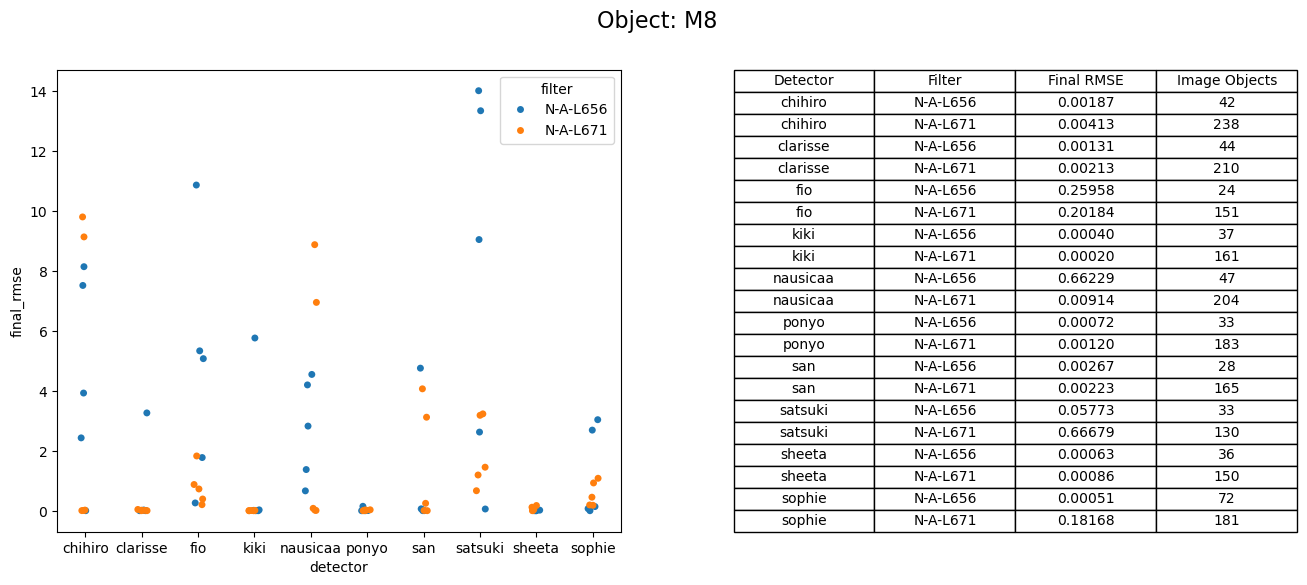

In [13]:
tbl_cells = [[r[0][0], r[0][1], f'{r[1].final_rmse:.5f}', f'{r[1].image_objects}'] for r in summary_df.iterrows()]

fig, axs = plt.subplots(figsize=(16,6), ncols=2)

sb.stripplot(ax=axs[0],data=summary_comb, x='detector',y='final_rmse', hue='filter',
             order=['chihiro','clarisse','fio','kiki','nausicaa',
                    'ponyo','san','satsuki','sheeta','sophie'])
#ax.set_title(f'Object: {objname}', size=16)


# tbl = axs[1].table(cellText=tbl_cells,
#                   colLabels = ['Detector', 'Filter', 'Final RMSE' 'Image Objects'],
#                   rowLabels = None,
#                   loc='center', cellLoc='center',
#                   bbox = (0.2,0,1,1) )
# #tbl.auto_set_column_width(col=[0,1])
tbl = axs[1].table(cellText=tbl_cells,
                  colLabels = ['Detector', 'Filter', 'Final RMSE', 'Image Objects'],
                  loc='center', cellLoc='center',
                  bbox = (0.0,0,1,1) )
#tbl.auto_set_column_width(col=[0,1])
tbl.auto_set_font_size(False)
axs[1].axis('off')
zz=fig.suptitle(f'Object: {objname}', size=16)

In [ ]:
summary_ha.sort_values('final_rmse', ascending=False)

,transpath,detector,image_objects,catalog_objects,niter,initial_rmse,final_rmse,extraction_threshold,obj_minpix,obj_maxpix,poly_degree,catalog_maxmag,maxiter,filter,image
32,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,satsuki,30,9049,1,14.001188,14.001188,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564845
28,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,satsuki,42,7173,1,13.333582,13.333582,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564835
22,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,fio,35,8768,3,21.726760,10.857015,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564822
37,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,satsuki,24,8515,3,15.330505,9.039497,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564805
0,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,chihiro,43,11217,3,21.742514,8.135035,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564836
15,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,chihiro,46,11340,3,17.950498,7.509924,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564846
34,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,kiki,30,7240,2,28.620739,5.757797,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564801
41,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,fio,47,8340,3,18.944859,5.329902,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564802
12,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,fio,38,7965,5,24.197657,5.069636,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564842
38,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,san,31,10811,2,14.861908,4.753095,50.0,70,1000,3,18.5,10,N-A-L656,SUPA01564849
